# House Prices Prediction Competition

## Preface

This is my first Kaggle Competition Ever. I have completed a few machine learning projects in my university and while doing an intership, and finally decided to apply ny knowledge on Kaggle.

I've found the inspiration for this work in these great notebooks:
1. [Comprehensive data exploration with Python](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python). This is a great notebook to dive into data exploration and have some fun while reading.
2. [A study of Regression applied to Ames dataset](https://www.kaggle.com/code/juliencs/a-study-on-regression-applied-to-the-ames-dataset). Here I've found some great examples of Feature Engineering.
3. [Stacked Regressions: Top 4% on LeaderBoard](https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard). This notebook is a combination of the above, and provides an example of ensembled learning.

## Table of contents.
1. EDA:
    - Variable Distribution
    - Correlation Analysis
    - Scatter Plots
    - Multicollinearity
2. Data Cleaning:
    - Removing Features
    - Handling Missing Data
    - Removing Outliers
    - Normilizing Variables
    - Dummy Encoding
3. Modeling:
    - Model Training
    - Cross Validation
    - Hyperparameter Tuning
    - Model Evaluation
4. Submitting results:
    - Making Predictions
    - Submitting Results

## EDA

In [172]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from scipy.stats import norm, skew

import warnings
warnings.filterwarnings('ignore')

In [173]:
# import data
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [174]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We don't need Id column in our dataframe, so let's drop it and save into distinct variable.

In [175]:
train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

In [176]:
print('Shape of initial training dataframe:', df_train.shape)
print('Shape of initial testing dataframe:', df_test.shape)

Shape of initial training dataframe: (1460, 80)
Shape of initial testing dataframe: (1459, 79)


### Preventive Feature Engineering

### Map Values

From data description we can see, that MSSubClass is a numeric feature, that represents categories. We can find the mappings in the same description test file.

We also have some categorical features, that can be represented as numerical, because they show quality of something.

So let's map these values to have more valuable Data Analysis.

In [177]:
# define mappings

ms_sub_class_map = {
    20: "1-STORY 1946 & NEWER ALL STYLES",
    30: "1-STORY 1945 & OLDER",
    40: "1-STORY W/FINISHED ATTIC ALL AGES",
    45: "1-1/2 STORY - UNFINISHED ALL AGES",
    50: "1-1/2 STORY FINISHED ALL AGES",
    60: "2-STORY 1946 & NEWER",
    70: "2-STORY 1945 & OLDER",
    75: "2-1/2 STORY ALL AGES",
    80: "SPLIT OR MULTI-LEVEL",
    85: "SPLIT FOYER",
    90: "DUPLEX - ALL STYLES AND AGES",
   120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
   150: "1-1/2 STORY PUD - ALL AGES",
   160: "2-STORY PUD - 1946 & NEWER",
   180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
   190: "2 FAMILY CONVERSION - ALL STYLES AND AGES"
}

features_and_maps = []

features = ["ExterQual", "ExterCond", "HeatingQC", "KitchenQual"]
mapping = {
    "Ex": 5,
    "Gd": 4,
    "TA": 3,
    "Fa": 2,
    "Po": 1
}
features_and_maps.append((features, mapping))

features = ["BsmtQual", "BsmtCond", "FireplaceQu", "GarageQual", "GarageCond"]
mapping = {
    "Ex": 5,
    "Gd": 4,
    "TA": 3,
    "Fa": 2,
    "Po": 1,
    "NA": -1,
    np.nan: -1
}
features_and_maps.append((features, mapping))

features = ["BsmtExposure"]
mapping = {
    'Gd': 3,
    'Av': 2,
    'Mn': 1,
    'No': 0,
    'NA': -1,
    np.nan: -1
}
features_and_maps.append((features, mapping))

features = ["BsmtFinType1", "BsmtFinType2"]
mapping = {
    'GLQ': 5,
    'ALQ': 4,
    'BLQ': 3,
    'Rec': 2,
    'LwQ': 1,
    'Unf': 0,
    'NA': -1,
    np.nan: -1
}
features_and_maps.append((features, mapping))

features = ["GarageFinish"]
mapping = {
    "Fin": 2,
    "RFn": 1,
    "Unf": 0,
    "NA": -1,
    np.nan: -1
}
features_and_maps.append((features, mapping))

features = ["PoolQC"]
mapping = {
    "Ex": 4,
    "Gd": 3,
    "TA": 2,
    "Fa": 1,
    "NA": -1,
    np.nan: -1
}
features_and_maps.append((features, mapping))

features = ["Fence"]
mapping = {
    "GdPrv": 3,
    "MnPrv": 2,
    "GdWo": 1, 
    "MnWw": 0,
    "NA": -1,
    np.nan: -1
}
features_and_maps.append((features, mapping))

In [178]:
# apply mappings

df_train['MSSubClass'] = df_train['MSSubClass'].map(ms_sub_class_map)
df_test['MSSubClass'] = df_test['MSSubClass'].map(ms_sub_class_map)

for features, mapping in features_and_maps:
    for feature in features:
        df_train[feature] = df_train[feature].map(mapping)
        df_test[feature] = df_test[feature].map(mapping)

### Feature and Dependable Variable Distributions

#### Dependable Variable

Let's explore the distribution of SalePrice.

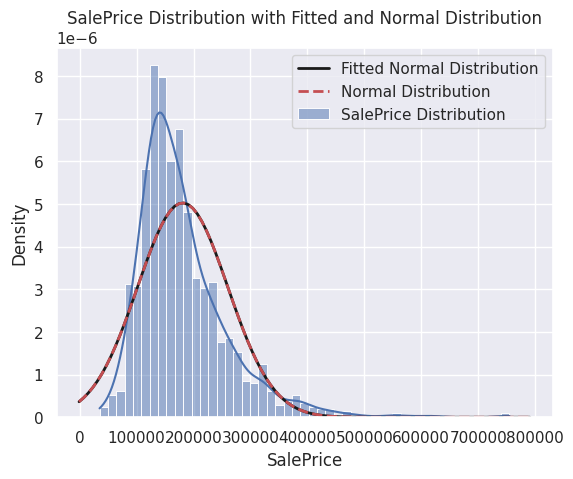

In [179]:
# plot SalePrice and its Distribution with fitted Normal Distribution

# plot SalePrice
sns.histplot(df_train['SalePrice'], kde=True, stat="density", label='SalePrice Distribution')

mu, std = norm.fit(df_train['SalePrice'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

# plot Normal Distribution
mean = df_train['SalePrice'].mean()
std_dev = df_train['SalePrice'].std()
p_normal = norm.pdf(x, mean, std_dev)
plt.plot(x, p_normal, 'r--', linewidth=2, label='Normal Distribution')

plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.title('SalePrice Distribution with Fitted and Normal Distribution')
plt.legend()

plt.show()

As all notebooks mentioned above note, Sale Price is right-skewed. We can scale current distribution so that it fits into normal by applying logarithms to the data.

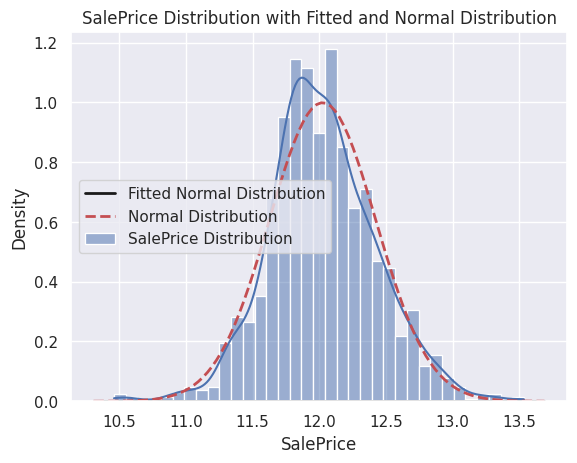

In [180]:
# plot logged SalePrice and its Distribution with fitted Normal Distribution

# plot SalePrice
sns.histplot(np.log1p(df_train['SalePrice']), kde=True, stat="density", label='SalePrice Distribution')

mu, std = norm.fit(df_train['SalePrice'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

# plot Normal Distribution
mean = np.log1p(df_train['SalePrice']).mean()
std_dev = np.log1p(df_train['SalePrice']).std()
p_normal = norm.pdf(x, mean, std_dev)
plt.plot(x, p_normal, 'r--', linewidth=2, label='Normal Distribution')

plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.title('SalePrice Distribution with Fitted and Normal Distribution')
plt.legend()

plt.show()

After the transformation we can see, that now dependent variable is almost normally distributed. That will help linear models to fit the data better.

Note, that we have transfomed SalePrice just for this example. It still has original values in training dataframe.

#### Features

Now let's check distributions of some numeric features.

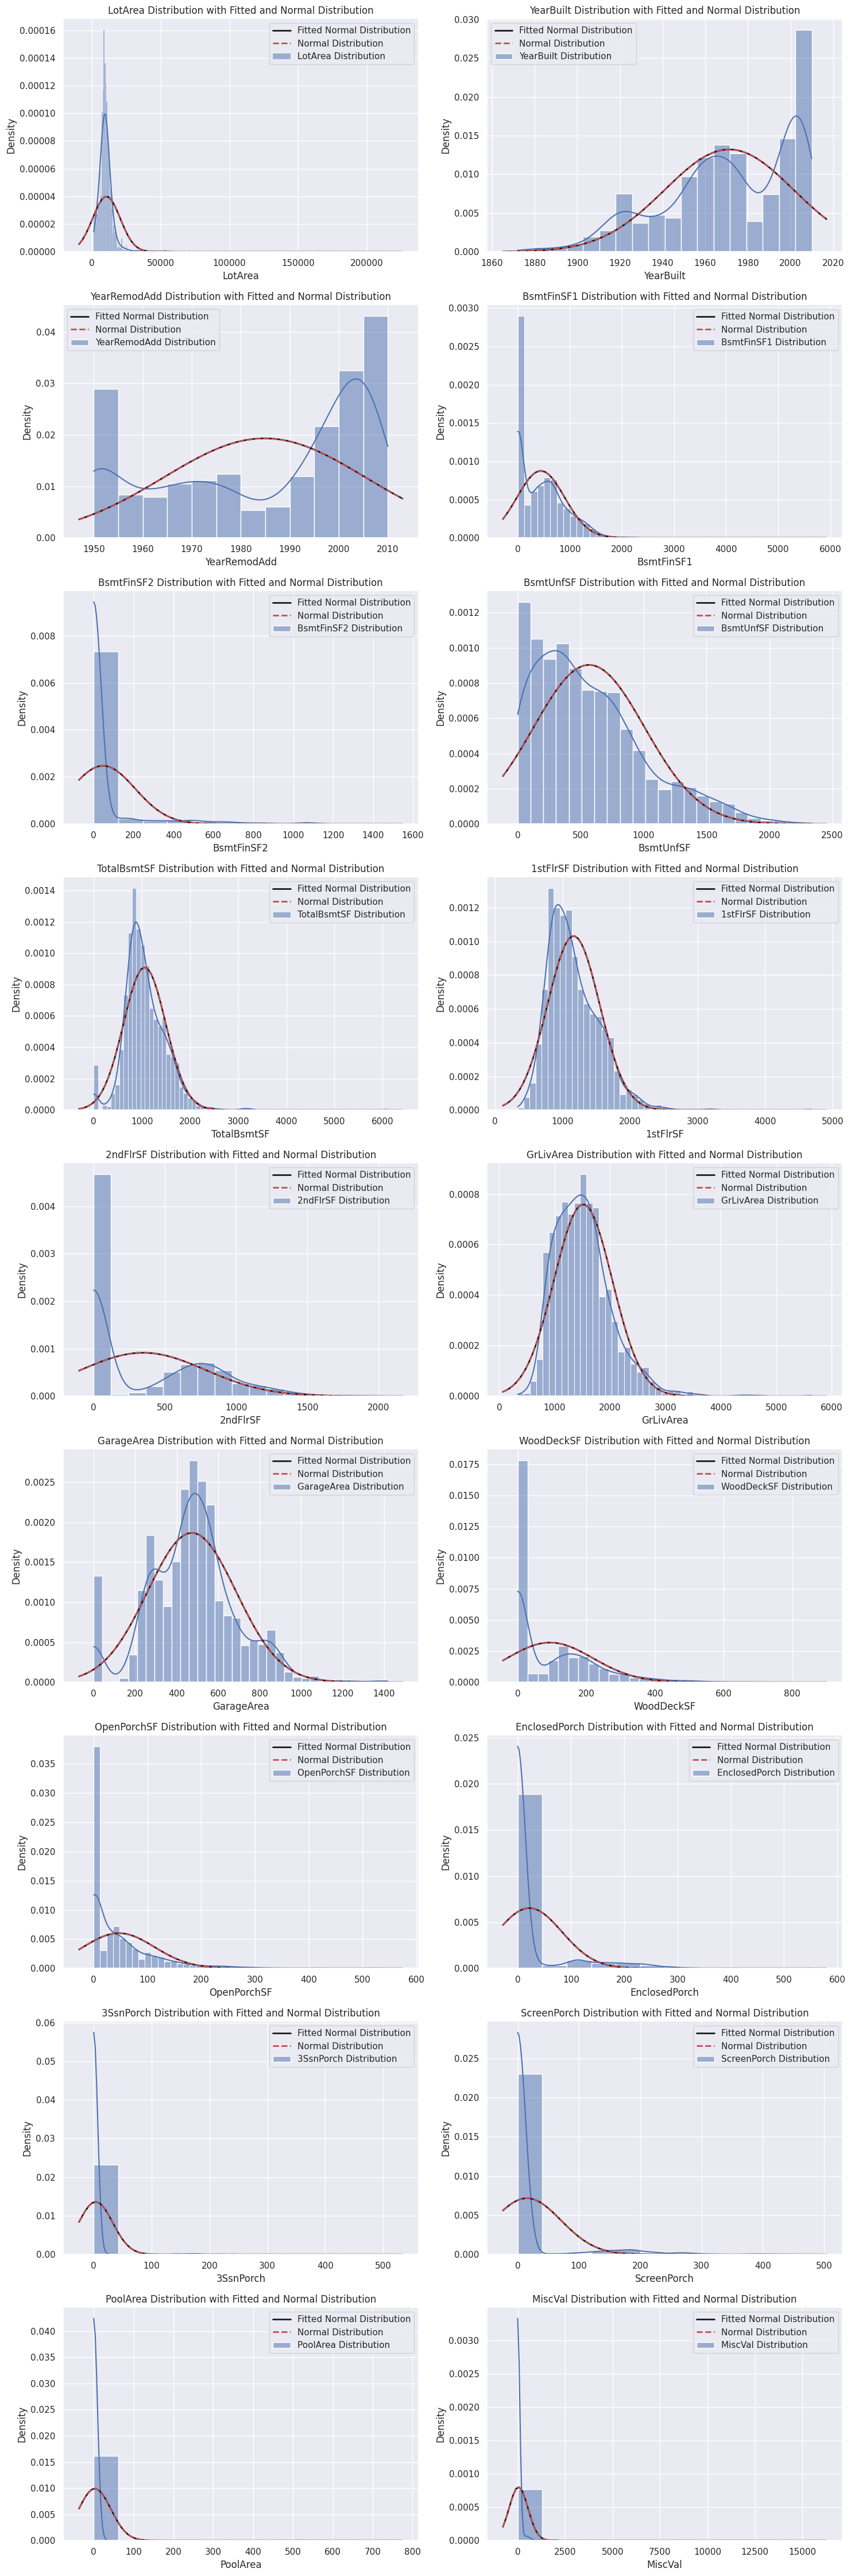

In [181]:
# plot Distributions with fitted Normal Distribution for some columns

# select columns
selected_columns = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                    '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

n_cols = 2
n_rows = int(np.ceil(len(selected_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

axes = axes.flatten()

for i, column in enumerate(selected_columns):
    ax = axes[i]

    # plot column
    sns.histplot(df_train[column], kde=True, stat="density", label=f'{column} Distribution', ax=ax)

    mu, std = norm.fit(df_train[column])

    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

    # plot Normal Distribution
    mean = df_train[column].mean()
    std_dev = df_train[column].std()
    p_normal = norm.pdf(x, mean, std_dev)
    ax.plot(x, p_normal, 'r--', linewidth=2, label='Normal Distribution')

    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.set_title(f'{column} Distribution with Fitted and Normal Distribution')
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Here are the features that are right skewed:
* 1stFlrSF
* TotalBsmtSF
* BsmtUnfSF
* GrLivArea
    
And here are the features that have some values equal to 0, while these values represent the size of something:
* ScreenPorch
* OpenPorchSF
* WoodDeckSF
* GarageArea
* 2ndFlSF
* TotalBsmtSF
* BsmtFinSF1
* BsmtFinSF2
* BsmtUnfSF
    
We might want to add categorical features for these numerical features, where categorical features will indicate zero/non-zero value for numerical feature. Then, among 2 features we will choose the one that have higher correlaction with SalePrice.

### Correlation Analysis

#### All Features Correlation

Let's now look at the correlation between different features and target variable. 

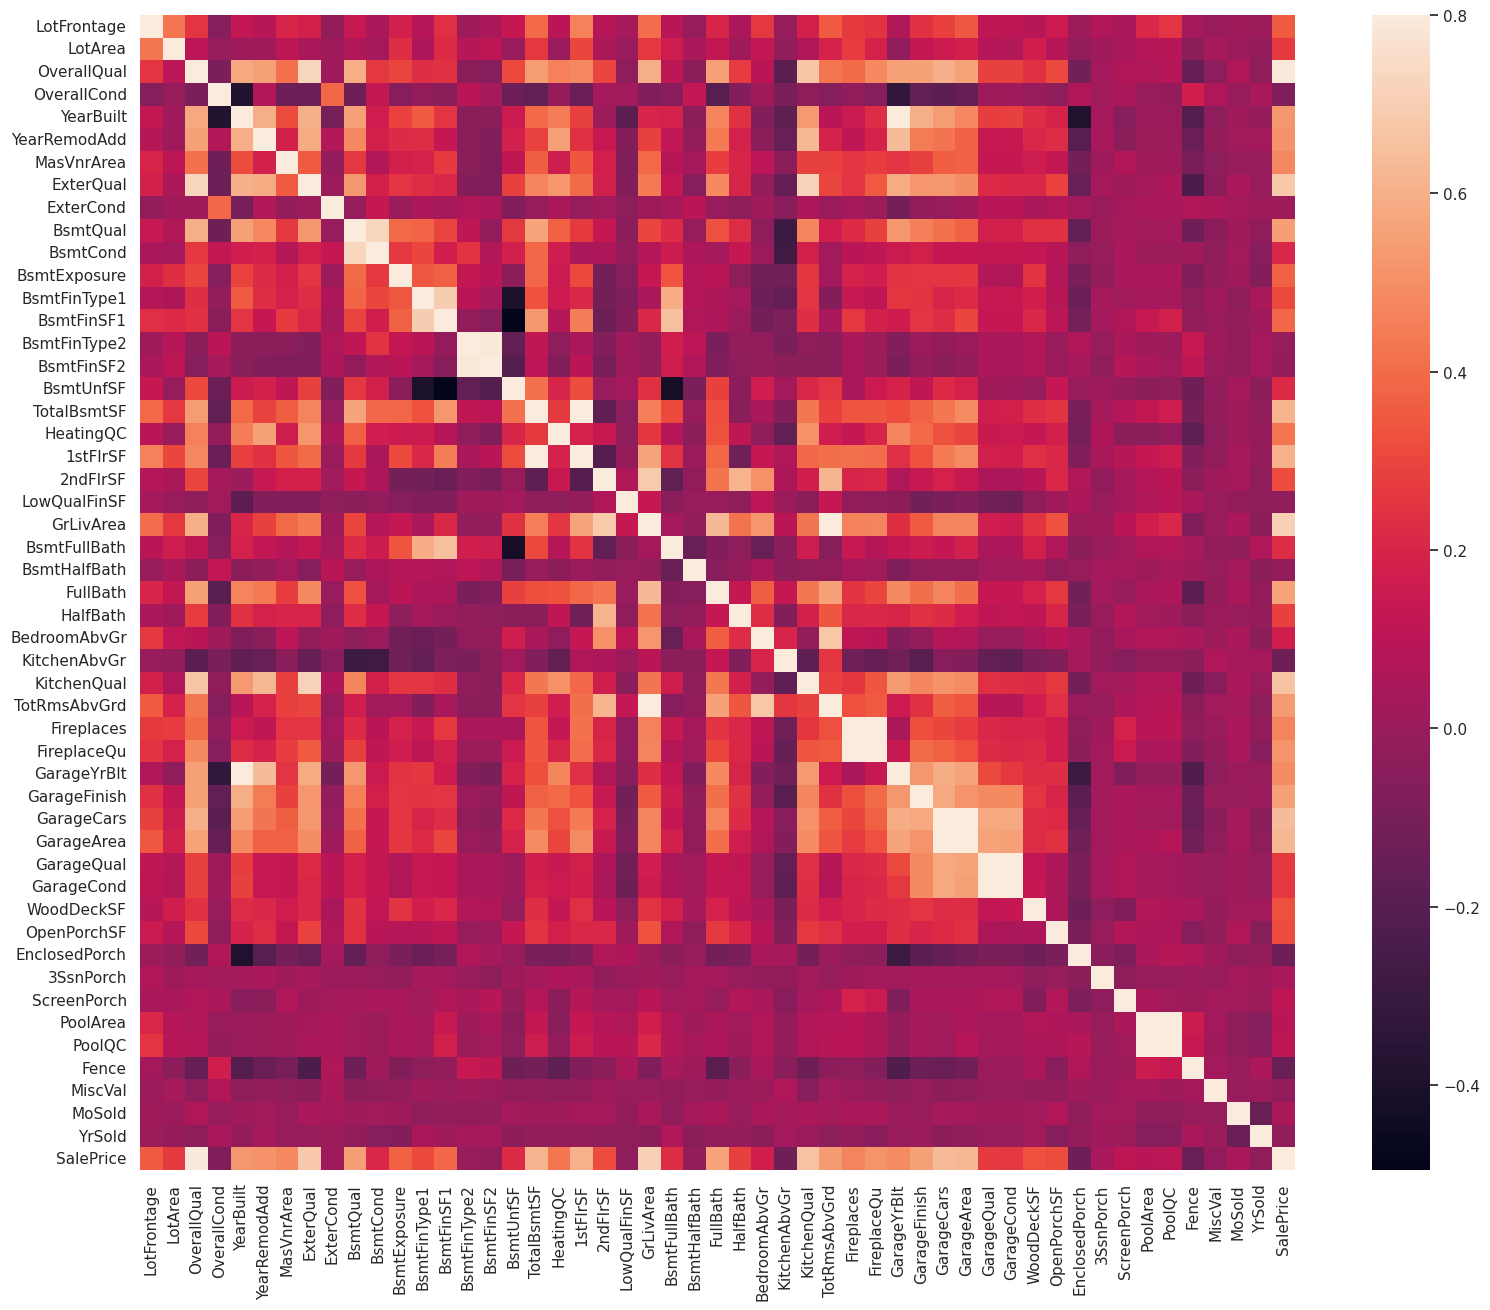

In [182]:
# plot correlation matrix for all features

numeric_columns = df_train.select_dtypes(include=np.number).columns
corrmat = df_train[numeric_columns].corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

We can see some white squares, that result in high correlation. Also, we can note, that BsmtUnfSF has some high negative correlations. Let's check the numbers.

In [183]:
# print top 10 highest and top 5 lowest correlations

corr_series = corrmat.unstack().sort_values(ascending=False)

corr_series = corr_series[corr_series != 1.0]

top_10_high = corr_series.iloc[:20].iloc[1::2]
top_10_low = corr_series.iloc[-10:].iloc[1::2]

print("Top 10 highest correlations:")
print(top_10_high)
print("\nTop 5 lowest correlations:")
print(top_10_low)

Top 10 highest correlations:
GarageCond   GarageQual      0.975987
PoolArea     PoolQC          0.937057
GarageArea   GarageCars      0.882475
FireplaceQu  Fireplaces      0.878080
YearBuilt    GarageYrBlt     0.825667
GrLivArea    TotRmsAbvGrd    0.825489
1stFlrSF     TotalBsmtSF     0.819530
SalePrice    OverallQual     0.790982
BsmtFinSF2   BsmtFinType2    0.788986
ExterQual    OverallQual     0.726278
dtype: float64

Top 5 lowest correlations:
YearBuilt      OverallCond    -0.375983
EnclosedPorch  YearBuilt      -0.387268
BsmtUnfSF      BsmtFinType1   -0.400184
BsmtFullBath   BsmtUnfSF      -0.422900
BsmtUnfSF      BsmtFinSF1     -0.495251
dtype: float64


From here we can see that many features describing the same part of the house have high correlation between each other: Garage, Number of Rooms and Square Feets, Basement and Quality of different aspects of the property.

Regarding negative correlations, we can observe the same pattern for Basement as for positive correlations.

Let's observe correlation of different features with target variable and decide which features we need to drop to avoid multicollinearity. 

#### Target Variable Correlation

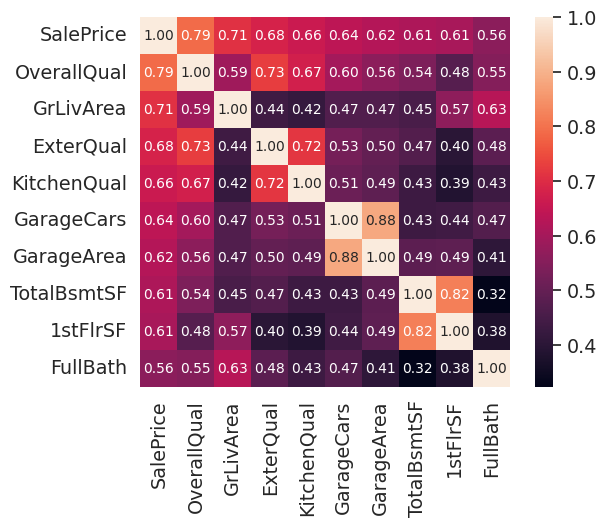

In [184]:
# plot top 10 correlations for SalePrice

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = df_train[cols].corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Note, that both GarageCars and GarageArea have high correlation with SalePrice. We can say that these variables mean the same thing, and drop one that has lower correlation - GarageArea in this case.

### Multicollinearity Detection

We have seen some features that have high correlation with each other. Let's see which of them we should leave.

In [185]:
# define groups of columns

garage_features = ['GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SalePrice']
rooms_features = ['TotRmsAbvGrd', 'GrLivArea', 'SalePrice']
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'SalePrice']
quality_features = ['OverallQual', 'ExterQual', 'BsmtQual', 'LowQualFinSF', 'KitchenQual', 'GarageQual', 'OverallCond', 'ExterCond', 'BsmtCond', 'GarageCond', 'SalePrice']

#### Garage Features

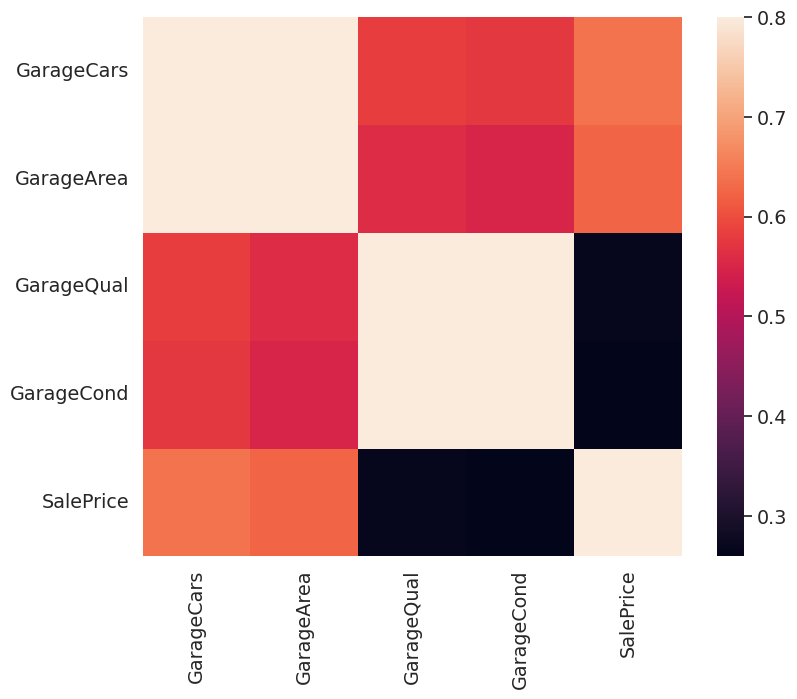

In [186]:
# plot correlations for garage features

corrmat = df_train[garage_features].corr()
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corrmat, vmax=.8, square=True);

We can confirm, that there is very high correlation between CarageCars and GarageArea. Also, their correlation with other features is similar. We will leave GarageCars, because its correlation with SalePrice is a bit higher.

Also note, that GarageCond correlates with GarageQaul. However, its correlation is about 0.6, and these features represent different things in practice, so we will not drop any of them.

#### Rooms Feature

In [187]:
# print correlations for living area and number of rooms

corrmat = df_train[rooms_features].corr()
corrmat

,TotRmsAbvGrd,GrLivArea,SalePrice
TotRmsAbvGrd,1.000000,0.825489,0.533723
GrLivArea,0.825489,1.000000,0.708624
SalePrice,0.533723,0.708624,1.000000


There is a high correlation between GrLivArea and TotRmsAbvGrd. Also, they both correlate with SalePrice. I will drop TotRmsAbvGrd because its correlation coefficient with SalePrice is lower.

#### Basement Features

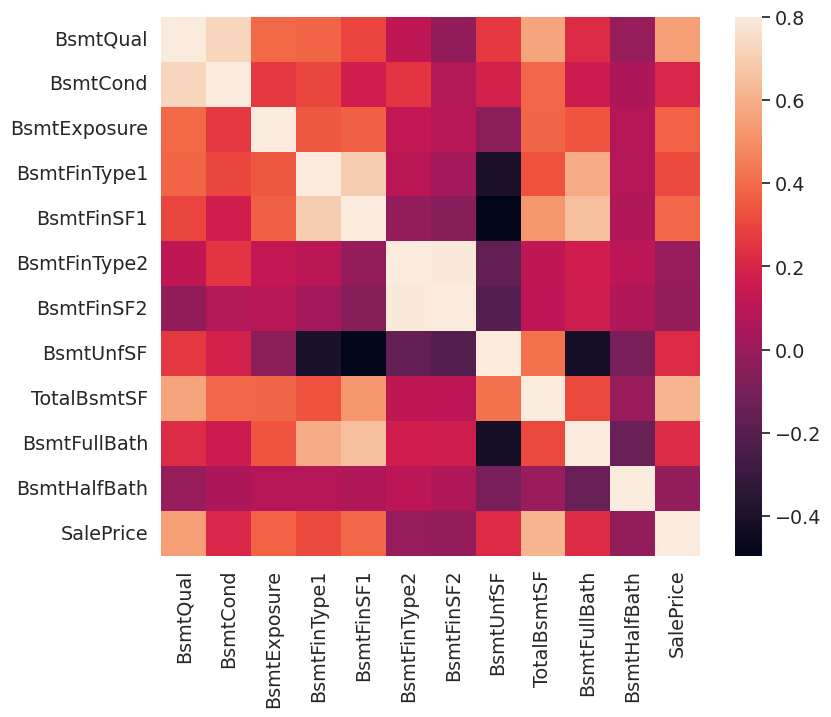

In [188]:
# plot correlations for basement features

corrmat = df_train[basement_features].corr()
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corrmat, vmax=.8, square=True);

BsmtQual is by far the most correlated basement feature with SalePrice. There is also a dependency between BsmtFinType1 and BsmtFinSF1, and BsmtFinType2 and BsmtFinSF2. I will leave SF features, because they are original.

#### Quality and Condition Features

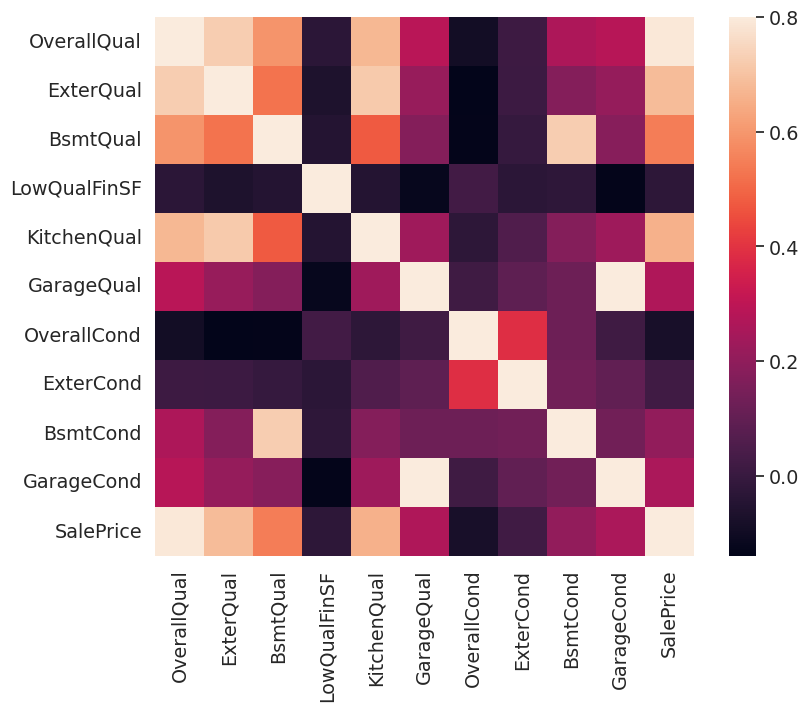

In [189]:
# plot correlations for quality and condition features

corrmat = df_train[quality_features].corr()
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corrmat, vmax=.8, square=True);

Here we see some interesting things. There is a high correlation between OverallQual and other quality features. It makes sense, because that is how overall quality is estimated.

Also note that all quality features have high correlation between each other. Roughly said, we can assume that all parts of houses are either of high quality, medium quality or low quality.

It makes sense to drop individual quality columns and leave OverallQual. Moreover, it has really high correlation with SalePrice.

### Scatter Plots

#### Most Relevant Variables

Now let's try to use scatter plots to see the dependecy between some of the variables and explore if we need to do feature engineering for the columns, that have a lot of zeros.

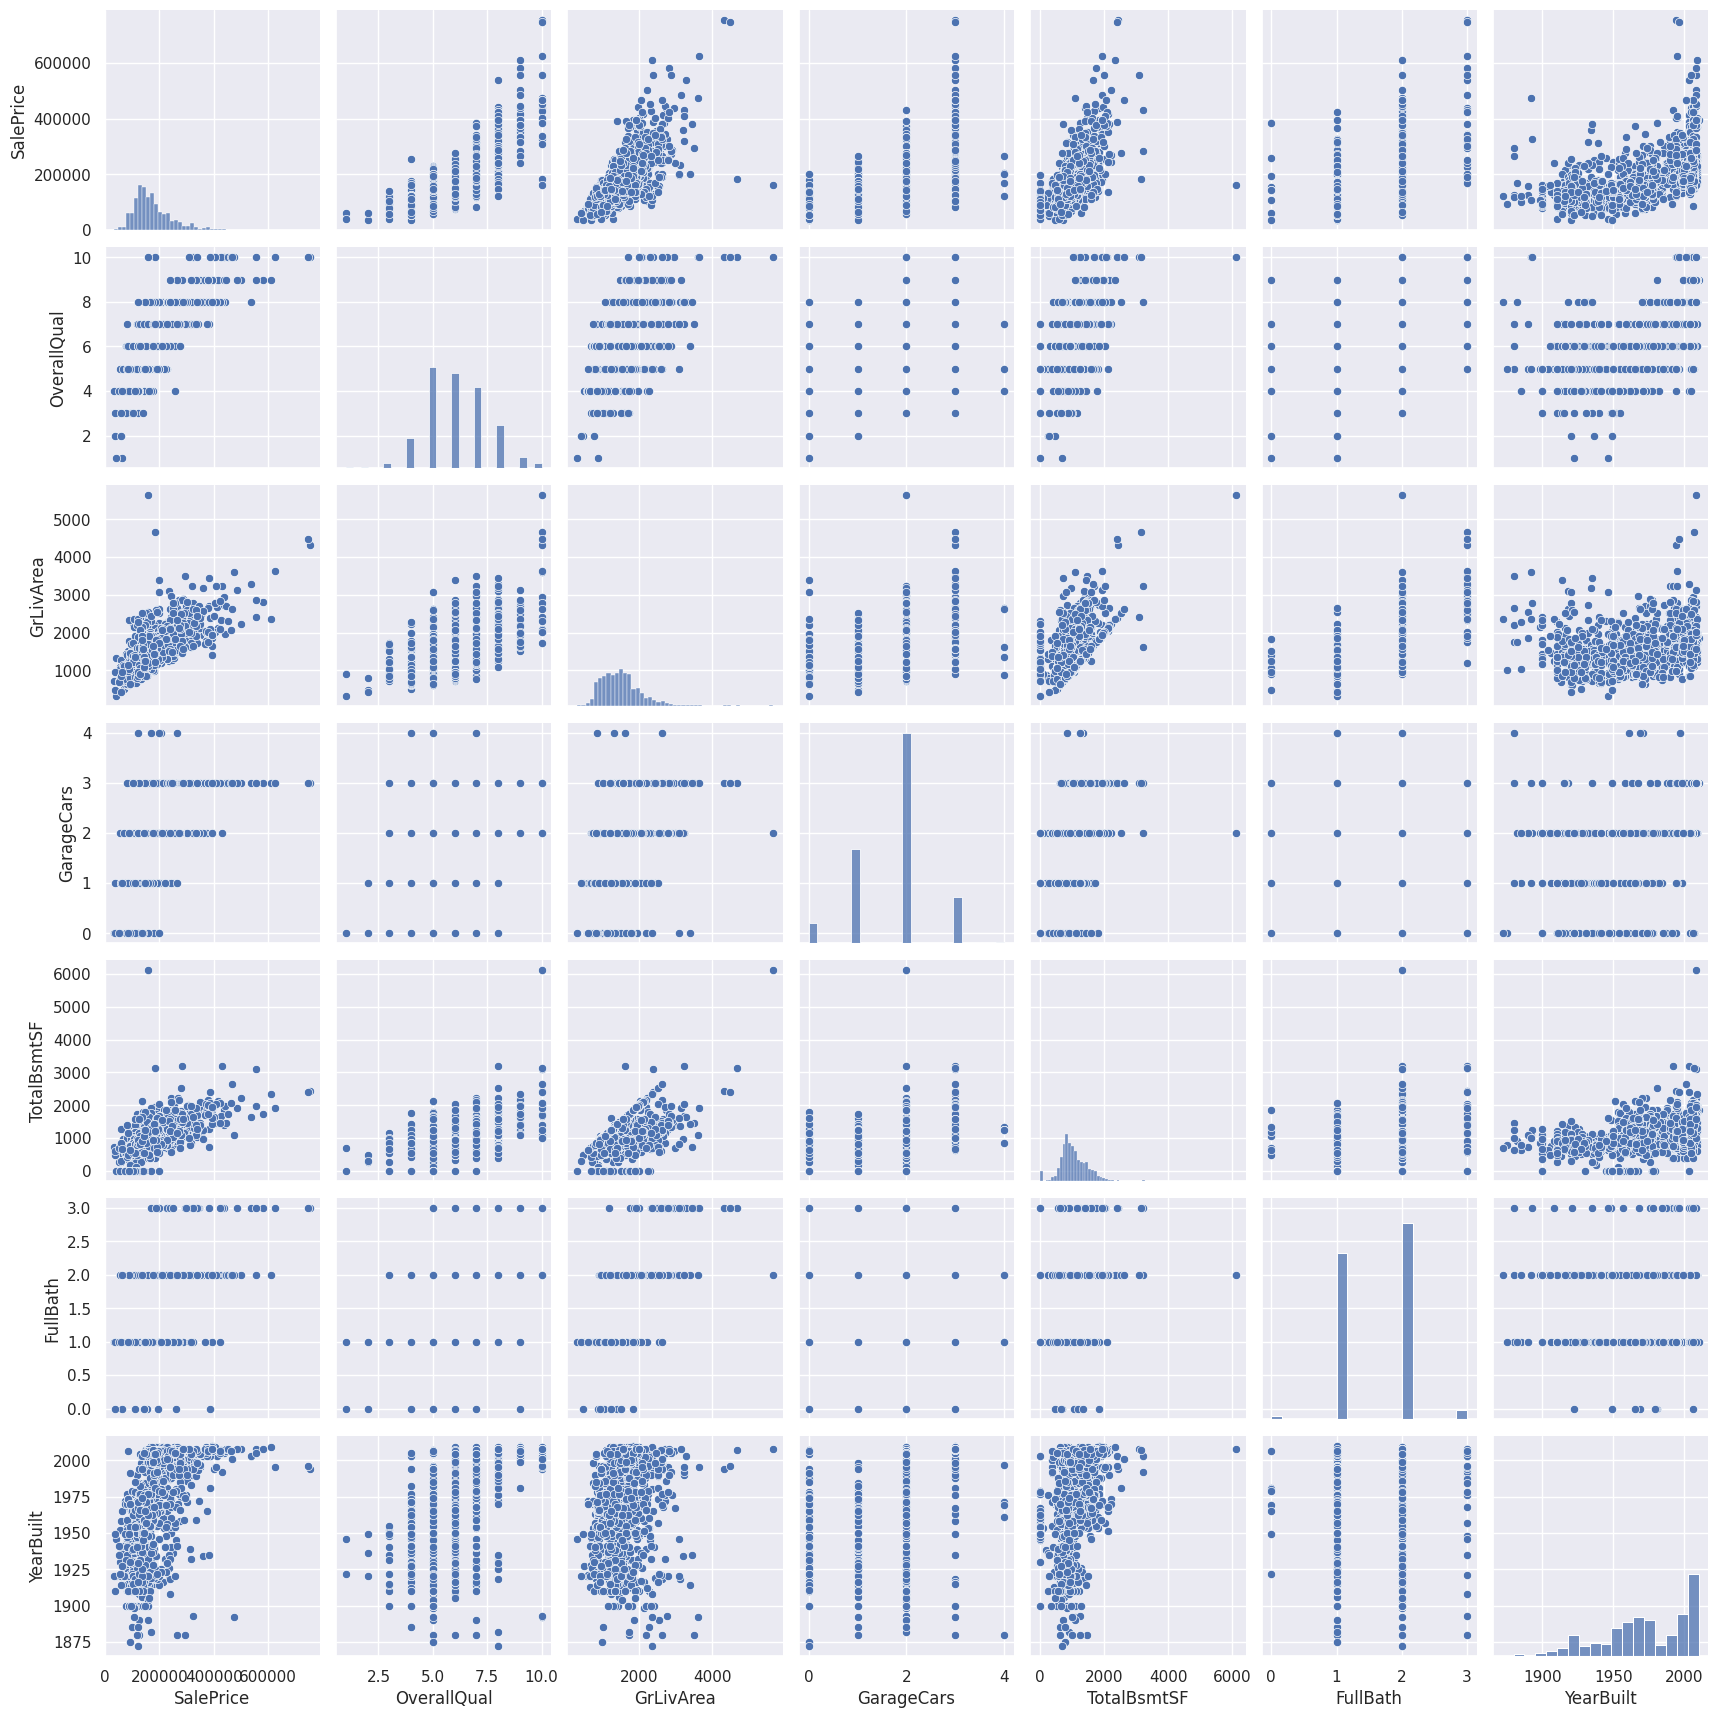

In [190]:
# plot scatter plots for most relevant columns

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

We can confirm that all chosen values have correlation with transformed target variable.

As was noted in 1st mentioned notebook, there is a line on plot between GrLivArea and TotalBsmtFeet. It is because there aren't many houses that have larger basement area than the area of the first floor.

#### Columns with a lot of Zeros

Now let's look if we can add some information with feature engineering of these columns, that have a lot of zeros: ScreenPorch, OpenPorchSF, WoodDeckSF, GarageArea, 2ndFlSF, TotalBsmtSF, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF.

In [191]:
# create binary values dataframe

zero_cols = ['ScreenPorch', 'OpenPorchSF', 'WoodDeckSF', 'GarageArea', '2ndFlrSF', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
zero_cols_df = df_train[zero_cols]
for col in zero_cols:
    zero_cols_df[f'{col}Bin'] = zero_cols_df[col].apply(lambda x: 0 if x == 0 else 1)
    
zero_cols_df['SalePrice'] = df_train['SalePrice']

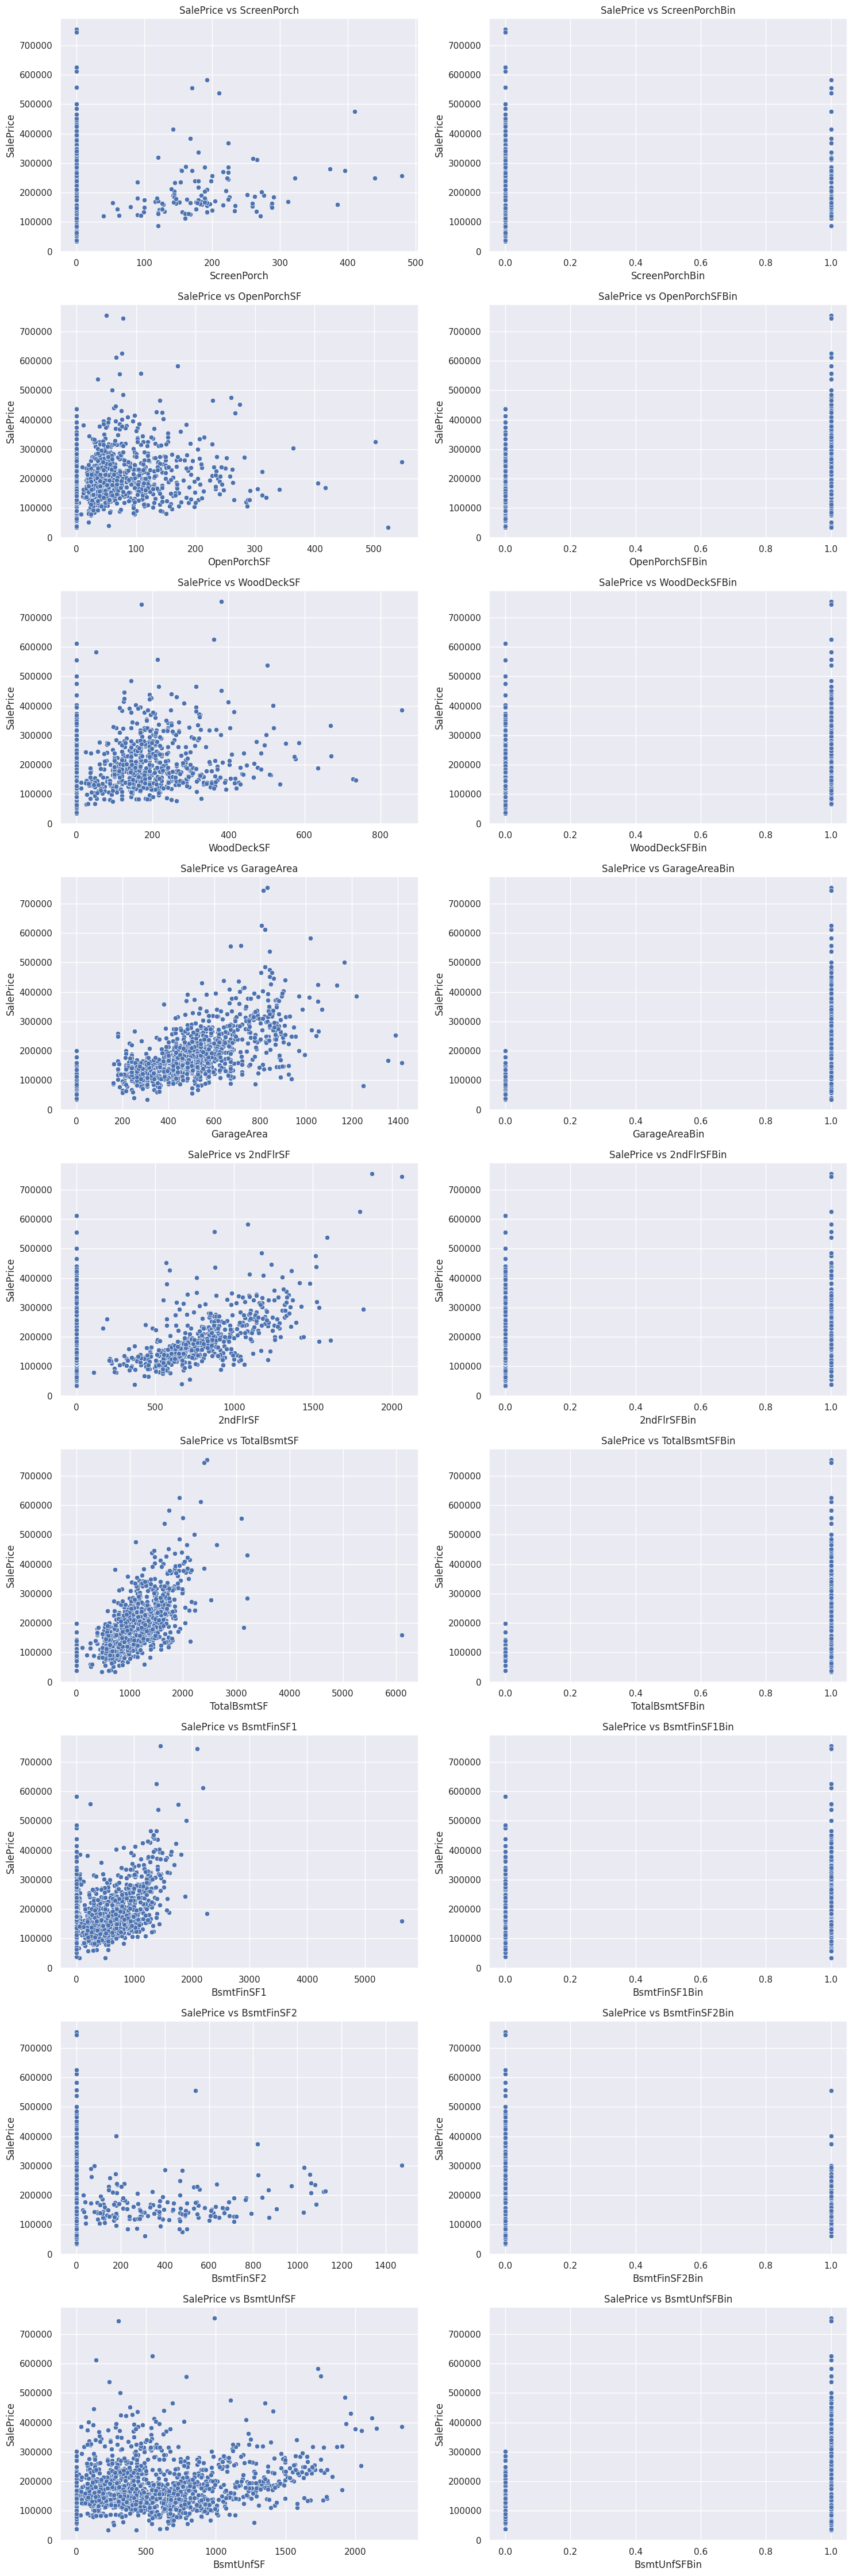

In [192]:
# compare binary values dataframe with original dataframe

num_cols = len(zero_cols)
fig, axes = plt.subplots(num_cols, 2, figsize=(15, 5 * num_cols))

for i, col in enumerate(zero_cols):
    sns.scatterplot(x=zero_cols_df[col], y=zero_cols_df['SalePrice'], ax=axes[i, 0])
    axes[i, 0].set_title(f'SalePrice vs {col}')
    
    sns.scatterplot(x=zero_cols_df[f'{col}Bin'], y=zero_cols_df['SalePrice'], ax=axes[i, 1])
    axes[i, 1].set_title(f'SalePrice vs {col}Bin')

plt.tight_layout()
plt.show()

If we exclude zeros from all the plots on the left, we can observe some sort of correlation almost in every case. Plots on the right didnt give the expected results. So we'll stick with original columns

## Feature Engineering

### Outliers

#### Univariate analysis

In [193]:
# print low and high range for SalePrice

from sklearn.preprocessing import StandardScaler

saleprice_array = df_train['SalePrice'].values.reshape(-1, 1)
scaler = StandardScaler()
saleprice_scaled = scaler.fit_transform(saleprice_array)
low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]

print('Outer range (low) of the distribution:')
print(low_range)
print('\nOuter range (high) of the distribution:')
print(high_range)

Outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

Outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


Low range values are not far from 0. But high range values greater than 7 are really out of range. We will remove these values.

#### Bivariate analysis

Let's closer explore some scatter plots.

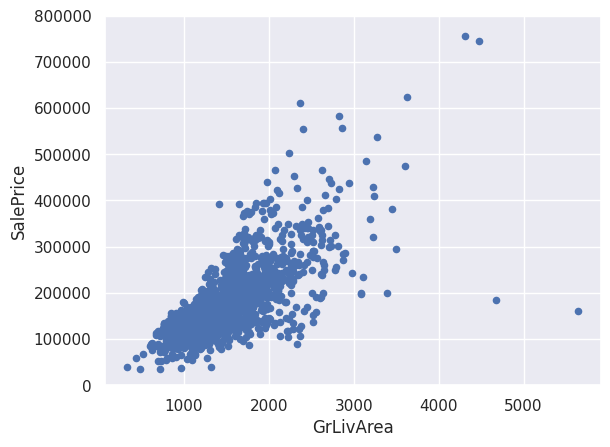

In [194]:
# plot living area agains sale price

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Note 2 outliers with high GrLivArea and low price. We will remove them.

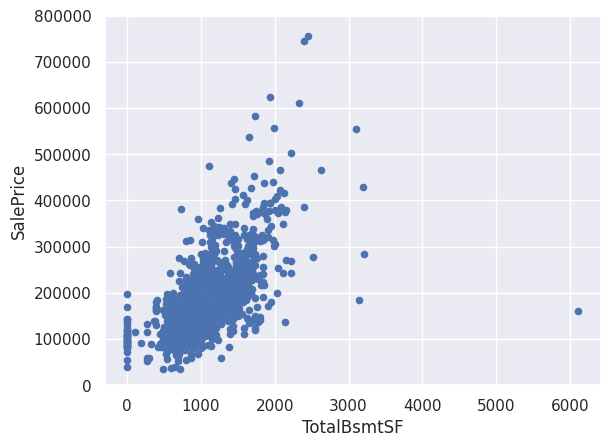

In [195]:
# plot basement area agains sale price

var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We see one value with really high TotalBsmtSF. We will remove it. other values seem okay.

#### Drop Outliers

In [196]:
# drop outliers defined earlier

df_train = df_train[df_train['SalePrice'] <= 700000]
df_train = df_train[df_train['GrLivArea'] <= 4000]
df_train = df_train[df_train['TotalBsmtSF'] <= 6000]

print('Number of observations after data cleaning: ', df_train.shape[0])

Number of observations after data cleaning:  1456


### Feature Normalization

Before applying other operations on our data, let's concatenate training and testing data.

In [201]:
# concat training and testing sets and split to features and label

train_size = df_train.shape[0]
test_size = df_test.shape[0]
y_train_full = df_train['SalePrice']
df = pd.concat((df_train, df_test)).reset_index(drop=True)
df.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(df.shape))

all_data size is : (2915, 79)


Let's check skewness of features.

In [207]:
# check skewness of features

numeric_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.932147
PoolQC,20.921993
PoolArea,18.701829
LotArea,13.123758
LowQualFinSF,12.080315
3SsnPorch,11.368094
KitchenAbvGr,4.298845
BsmtFinSF2,4.142042
EnclosedPorch,4.000796
ScreenPorch,3.943508


We can apply Box Cox transformation to this features. This transformation is typically used for highly skewed features.

In [208]:
# check numer of features to be normalized 

skewness = skewness[abs(skewness['Skew']) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 29 skewed numerical features to Box Cox transform


In [209]:
# normalize features

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)

In [210]:
# normalize label

y_train_full = np.log1p(y_train_full)

### Missing Data

#### Drop Columns

First, let's drop all the column we have decided to, so that we won't care about their missing values.

In [213]:
cols_to_drop = ['ExterQual', 'BsmtQual', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'TotRmsAbvGrd', 'GarageArea']
df.drop(cols_to_drop, axis=1, inplace=True)

#### Check Missing Values Count and Percentage

In [214]:
# print number of missing values and their percentage

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MiscFeature,2810,0.963979
Alley,2717,0.932075
MasVnrType,1765,0.605489
LotFrontage,486,0.166724
GarageYrBlt,159,0.054545
GarageType,157,0.053859
MasVnrArea,23,0.007890
MSZoning,4,0.001372
BsmtHalfBath,2,0.000686
BsmtFullBath,2,0.000686


#### Misc- Columns

MiscFeature represents if house has some unique feature. NaN value is just an indicator that there isn't any unique feature for this house.

In [215]:
df["MiscFeature"] = df["MiscFeature"].fillna("None")

#### Alley

NaN values in Alley column tell us about no access to alley. So we can replace them with 'None' and use as a cateogry later.

In [216]:
df['Alley'] = df['Alley'].fillna('None')

#### MasVnrType

NaN means no masonary veneer for the house. Let's fill it with None, and any missing values for area with 0.

In [217]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

#### LotFrontage

Let's replace NaN value in LotFrontage with rounded mean value of the Neighborhood in which house is located.

In [218]:
# fill values for lot frontage by neighborhood

neighborhood_means = df.groupby('Neighborhood')['LotFrontage'].mean().round()

def fill_na_with_mean(row):
    if np.isnan(row['LotFrontage']):
        return neighborhood_means[row['Neighborhood']]
    else:
        return row['LotFrontage']

df['LotFrontage'] = df.apply(fill_na_with_mean, axis=1)

#### Garage Features

Let's observe the correlation between GarageYrBlt and YearBuilt.

In [219]:
# check garage year built correlations

corrmat = df_train[['GarageYrBlt', 'YearBuilt', 'SalePrice']].corr()
corrmat

,GarageYrBlt,YearBuilt,SalePrice
GarageYrBlt,1.000000,0.825192,0.499230
YearBuilt,0.825192,1.000000,0.535279
SalePrice,0.499230,0.535279,1.000000


We can assume that garage was built the same or almost the same year as the house itself. So we can drop this column. I will also drop GarageType because GarageCars already contain enough information about the garage.

In [220]:
df.drop(['GarageType', 'GarageYrBlt'], axis=1, inplace=True)

For other garage features, I'll just fill them with 'None' or zero.

In [221]:
for col in ('GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

In [222]:
df['GarageCars'] = df['GarageCars'].fillna(0)

#### Basement Features

Filling basement missing values with 'None' and zeros.

In [223]:
for col in ('BsmtCond', 'BsmtExposure'):
    df[col] = df[col].fillna('None')

In [224]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

#### MSZoning

Fill MSZoning with the most common value.

In [225]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

#### Utilities

This column doesn't contain much information, so I will drop it.

In [226]:
df.drop(['Utilities'], axis=1, inplace=True)

#### Functional

NaN means Typical, as said in the description.

In [227]:
df["Functional"] = df["Functional"].fillna("Typ")

#### Electrical

Electrical also doesn't contain much information, so we will drop it.

In [228]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

#### Exterior Columns

Replace with the most common value.

In [229]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

#### Sale Type

Again, replace with the most common value.

In [230]:
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

### Changing Datatypes

Let's make month categorical feature.

In [231]:
df['MoSold'] = df['MoSold'].astype(str)

### Adding Features

Adding Total Square Feet feature may help models, because size of the house is one of the most important features.

In [232]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

### Dummy Encodings

In [233]:
df = pd.get_dummies(df)
print('Shape of data after all transformations:', df.shape)

Shape of data after all transformations: (2915, 248)


## Model Training

In [234]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook

### Some More Data Preprocessing

#### Split data back to training and testing sets

In [236]:
train = df[:train_size]
test = df[train_size:]

print('Shape of train data:', train.shape)
print('Shape of test data:', test.shape)

Shape of train data: (1456, 248)
Shape of test data: (1459, 248)


#### Scale the data

In [241]:
scaler = StandardScaler()
scaler.fit(train)
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

#### Split data to training, dev and test sets

In [242]:
X_train_dev, X_test, y_train_dev, y_test = train_test_split(train_scaled, y_train_full, test_size=0.1, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=X_test.shape[0], random_state=42)

print('Train set size:', X_train.shape[0])
print('Dev set size:', X_dev.shape[0])
print('Test set size:', X_test.shape[0])

Train set size: 1164
Dev set size: 146
Test set size: 146


### Base Model Training

#### Validation Function

We will use this function to evaluate our models.

In [244]:
# validation function
n_folds = 5

def rmsle_cv(model, X_train_inn, y_train_inn):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train_inn)
    rmse= np.sqrt(-cross_val_score(model, X_train_inn, y_train_inn, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#### Model Definitions

##### Linear Models

Lasso and ElasticNet have good performance on this dataset, so let's stick with them as our linear models.

In [245]:
lasso = Lasso(alpha=0.0005, random_state=42)
score = rmsle_cv(lasso, X_train, y_train)

lasso.fit(X_train, y_train)
train_preds = lasso.predict(X_train)
dev_preds = lasso.predict(X_dev)

train_rmse = np.sqrt(mean_squared_error(train_preds, y_train))
dev_rmse = np.sqrt(mean_squared_error(dev_preds, y_dev))

print("Lasso RMSE on cross validation: {:.4f} ({:.4f})".format(score.mean(), score.std()))
print("Lasso RMSE on training set: {:.4f}".format(train_rmse))
print("Lasso RMSE on dev set: {:.4f}".format(dev_rmse))

Lasso RMSE on cross validation: 0.1155 (0.0068)
Lasso RMSE on training set: 0.0903
Lasso RMSE on dev set: 0.1330


In [246]:
elastic_net = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=42)
score = rmsle_cv(elastic_net, X_train, y_train)

elastic_net.fit(X_train, y_train)
train_preds = elastic_net.predict(X_train)
dev_preds = elastic_net.predict(X_dev)

train_rmse = np.sqrt(mean_squared_error(train_preds, y_train))
dev_rmse = np.sqrt(mean_squared_error(dev_preds, y_dev))

print("ElasticNet RMSE on cross validation: {:.4f} ({:.4f})".format(score.mean(), score.std()))
print("ElasticNet RMSE on training set: {:.4f}".format(train_rmse))
print("ElasticNet RMSE on dev set: {:.4f}".format(dev_rmse))

ElasticNet RMSE on cross validation: 0.1157 (0.0068)
ElasticNet RMSE on training set: 0.0901
ElasticNet RMSE on dev set: 0.1335


##### Gradient Boosting Trees

Since our data contain large number of features, I've decided to use Gradient Boosting Trees instead of Random Forest or Decision Tree.

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state=42)
score = rmsle_cv(GBoost, X_train, y_train)

GBoost.fit(X_train, y_train)
train_preds = GBoost.predict(X_train)
dev_preds = GBoost.predict(X_dev)

train_rmse = np.sqrt(mean_squared_error(train_preds, y_train))
dev_rmse = np.sqrt(mean_squared_error(dev_preds, y_dev))

print("GradientBoosting RMSE on cross validation: {:.4f} ({:.4f})".format(score.mean(), score.std()))
print("GradientBoosting RMSE on training set: {:.4f}".format(train_rmse))
print("GradientBoosting RMSE on dev set: {:.4f}".format(dev_rmse))

In [247]:
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state=42, nthread=-1)
score = rmsle_cv(xgb, X_train, y_train)

xgb.fit(X_train, y_train)
train_preds = xgb.predict(X_train)
dev_preds = xgb.predict(X_dev)

train_rmse = np.sqrt(mean_squared_error(train_preds, y_train))
dev_rmse = np.sqrt(mean_squared_error(dev_preds, y_dev))

print("XGBoost RMSE on cross validation: {:.4f} ({:.4f})".format(score.mean(), score.std()))
print("XGBoost RMSE on training set: {:.4f}".format(train_rmse))
print("XGBoost RMSE on dev set: {:.4f}".format(dev_rmse))

XGBoost RMSE on cross validation: 0.1180 (0.0021)
XGBoost RMSE on training set: 0.0874
XGBoost RMSE on dev set: 0.1217


In [248]:
lgb = LGBMRegressor(objective='regression', num_leaves=5, 
                              learning_rate=0.05, n_estimators=720,
                              max_bin=55, subsample=0.8,
                              subsample_freq=5, colsample_bytree=0.2319,
                              colsample_bytree_seed=9, subsample_seed=9,
                              min_child_samples=6, min_child_weight=11,
                              verbose=-1)
score = rmsle_cv(lgb, X_train, y_train)

lgb.fit(X_train, y_train)
train_preds = lgb.predict(X_train)
dev_preds = lgb.predict(X_dev)

train_rmse = np.sqrt(mean_squared_error(train_preds, y_train))
dev_rmse = np.sqrt(mean_squared_error(dev_preds, y_dev))

print("XGBoost RMSE on cross validation: {:.4f} ({:.4f})".format(score.mean(), score.std()))
print("XGBoost RMSE on training set: {:.4f}".format(train_rmse))
print("XGBoost RMSE on dev set: {:.4f}".format(dev_rmse))

XGBoost RMSE on cross validation: 0.1155 (0.0039)
XGBoost RMSE on training set: 0.0689
XGBoost RMSE on dev set: 0.1282


LightGBM and Linear Models have better cross validation score, while XGBoost has the best dev test score. Let's try to fine tune all of these models.

### Hyperparameter Tuning

In [249]:
# tune ElasticNet

elastic_net = ElasticNet()

param_grid_en = {
    'alpha': [0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}

en_grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid_en, cv=5, scoring='neg_mean_squared_error')
en_grid_search.fit(X_train_dev, y_train_dev)

best_params = en_grid_search.best_params_
elastic_net = ElasticNet(**en_grid_search.best_params_)

score = rmsle_cv(elastic_net, X_train_dev, y_train_dev)

elastic_net.fit(X_train_dev, y_train_dev)
train_dev_preds = elastic_net.predict(X_train_dev)
test_preds = elastic_net.predict(X_test)

train_dev_rmse = np.sqrt(mean_squared_error(train_dev_preds, y_train_dev))
test_rmse = np.sqrt(mean_squared_error(test_preds, y_test))

print("Tuned ElasticNet RMSE on cross validation train-dev set: {:.4f} ({:.4f})".format(score.mean(), score.std()))
print("Tuned ElasticNet RMSE on train-dev set: {:.4f}".format(train_dev_rmse))
print("Tuned ElasticNet RMSE on test set: {:.4f}".format(test_rmse))

Tuned ElasticNet RMSE on cross validation train-dev set: 0.1197 (0.0091)
Tuned ElasticNet RMSE on train-dev set: 0.1135
Tuned ElasticNet RMSE on test set: 0.1250


In [250]:
# tune Lasso

lasso = Lasso()

param_grid_l = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

l_grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid_l, cv=5, scoring='neg_mean_squared_error')
l_grid_search.fit(X_train_dev, y_train_dev)

best_params = l_grid_search.best_params_
lasso = Lasso(**l_grid_search.best_params_)

score = rmsle_cv(lasso, X_train_dev, y_train_dev)

lasso.fit(X_train_dev, y_train_dev)
train_dev_preds = lasso.predict(X_train_dev)
test_preds = lasso.predict(X_test)

train_dev_rmse = np.sqrt(mean_squared_error(train_dev_preds, y_train_dev))
test_rmse = np.sqrt(mean_squared_error(test_preds, y_test))

print("Tuned Lasso RMSE on cross validation train-dev set: {:.4f} ({:.4f})".format(score.mean(), score.std()))
print("Tuned Lasso RMSE on train-dev set: {:.4f}".format(train_dev_rmse))
print("Tuned Lasso RMSE on test set: {:.4f}".format(test_rmse))

Tuned Lasso RMSE on cross validation train-dev set: 0.1184 (0.0093)
Tuned Lasso RMSE on train-dev set: 0.1124
Tuned Lasso RMSE on test set: 0.1249


In [256]:
# tune LGBM

lgb = LGBMRegressor(objective='regression', num_leaves=5, 
                              learning_rate=0.05, n_estimators=720,
                              max_bin=55, subsample=0.8,
                              subsample_freq=5, colsample_bytree=0.2319,
                              colsample_bytree_seed=9, subsample_seed=9,
                              min_child_samples=6, min_child_weight=11,
                              verbose=-1)

param_grid_lgb = {
    'n_estimators': [500, 1000, 2000],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [5, 10, 20],
    'max_bin': [55, 100, 255],
    'subsample': [0.5, 0.75, 1.0],
    'subsample_freq': [5, 10, 15],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'min_child_samples': [5, 10, 20],
    'min_child_weight': [1, 5, 10]
}



lgb_random_search = RandomizedSearchCV(estimator=lgb, param_distributions=param_grid_lgb, 
                                       n_iter=100, scoring='neg_mean_squared_error', 
                                       cv=3, verbose=1, random_state=42, n_jobs=-1)
lgb_random_search.fit(X_train_dev, y_train_dev)

best_params = lgb_random_search.best_params_
lgb = LGBMRegressor(**lgb_random_search.best_params_)

score = rmsle_cv(lgb, X_train_dev, y_train_dev)

lgb.fit(X_train_dev, y_train_dev)
train_dev_preds = lgb.predict(X_train_dev)
test_preds = lgb.predict(X_test)

train_dev_rmse = np.sqrt(mean_squared_error(train_dev_preds, y_train_dev))
test_rmse = np.sqrt(mean_squared_error(test_preds, y_test))

print("Tuned LGBM RMSE on cross validation train-dev set: {:.4f} ({:.4f})".format(score.mean(), score.std()))
print("Tuned LGBM RMSE on train-dev set: {:.4f}".format(train_dev_rmse))
print("Tuned LGBM RMSE on test set: {:.4f}".format(test_rmse))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 1048, number of used features: 178
[LightGBM] [Info] Start training from score 12.033131
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3152
[LightGBM] [Info] Number of data points in the train set: 1048, number of used features: 178
[LightGBM] [Info] Start training from score 12.019352
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3189
[LightGBM] [Info] Number of data points in the train se

In [259]:
# tune XGBoost

xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state=42, nthread=-1)

param_grid_xgb = {
    'n_estimators': [1000, 2000, 3000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 1.5, 2],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.5, 0.8, 1]
}



xgb_random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, 
                                       n_iter=100, scoring='neg_mean_squared_error', 
                                       cv=3, verbose=1, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train_dev, y_train_dev)

best_params = xgb_random_search.best_params_
lgb = XGBRegressor(**xgb_random_search.best_params_)

score = rmsle_cv(xgb, X_train_dev, y_train_dev)

xgb.fit(X_train_dev, y_train_dev)
train_dev_preds = xgb.predict(X_train_dev)
test_preds = xgb.predict(X_test)

train_dev_rmse = np.sqrt(mean_squared_error(train_dev_preds, y_train_dev))
test_rmse = np.sqrt(mean_squared_error(test_preds, y_test))

print("Tuned LGBM RMSE on cross validation train-dev set: {:.4f} ({:.4f})".format(score.mean(), score.std()))
print("Tuned LGBM RMSE on train-dev set: {:.4f}".format(train_dev_rmse))
print("Tuned LGBM RMSE on test set: {:.4f}".format(test_rmse))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Tuned LGBM RMSE on cross validation train-dev set: 0.1173 (0.0144)
Tuned LGBM RMSE on train-dev set: 0.0869
Tuned LGBM RMSE on test set: 0.1218


After hyperparameter tuning, best LGBM estimator has the highest score on test set. Anyway, let's retrain both on the whole training set that we have and ceate submission files.

### Retraining Final Model

In [260]:
xgb = XGBRegressor(**xgb_random_search.best_params_)
xgb.fit(train_scaled, y_train_full)
xgb_preds = xgb.predict(test_scaled)
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = np.expm1(xgb_preds)
submission.to_csv('tuned_xgb_preds.csv',index=False)

In [258]:
lgb = LGBMRegressor(**lgb_random_search.best_params_)
lgb.fit(train_scaled, y_train_full)
lgb_preds = lgb.predict(test_scaled)
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = np.expm1(lgb_preds)
submission.to_csv('tuned_lgb_preds.csv',index=False)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3542
[LightGBM] [Info] Number of data points in the train set: 1456, number of used features: 189
[LightGBM] [Info] Start training from score 12.021950
